In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from ucimlrepo import fetch_ucirepo #to import dataset from machine learning depot
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
df = bank_marketing.data.original
  


In [19]:
bank_marketing

{'data': {'ids': None,
  'features':        age           job   marital  education default  balance housing loan  \
  0       58    management   married   tertiary      no     2143     yes   no   
  1       44    technician    single  secondary      no       29     yes   no   
  2       33  entrepreneur   married  secondary      no        2     yes  yes   
  3       47   blue-collar   married        NaN      no     1506     yes   no   
  4       33           NaN    single        NaN      no        1      no   no   
  ...    ...           ...       ...        ...     ...      ...     ...  ...   
  45206   51    technician   married   tertiary      no      825      no   no   
  45207   71       retired  divorced    primary      no     1729      no   no   
  45208   72       retired   married  secondary      no     5715      no   no   
  45209   57   blue-collar   married  secondary      no      668      no   no   
  45210   37  entrepreneur   married  secondary      no     2971      no  

https://archive.ics.uci.edu/dataset/222/bank+marketing

variable names 

Input variables:
Bank Data
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
 other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Summary
Introduction:

The Bank Marketing dataset is data related to direct marketing campaigns of a Portugues Banking Company. It is a commonly accessed dataset from the UC Irvine Machine Learning Repository. Each row describes a customer of the bank. It has 16 features (columns) which describe the customer most importantly if they subscribed to a long-term deposit account. 
In this project, our imaginary stakeholders would be looking to gain investors into long-term deposit accounts. Our stakeholders interest would be to be able to correctly predict the behavior of their customers such that they might maximize their profits in subscriptions to long-term accounts. I would sell myself on being capable of contributing to that goal.


In [20]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN,no
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN,no
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN,no
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN,no


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.shape



(45211, 17)

# What this tells us

This informs us that the size of the data set is 45,211 rows with 17 columns. The dependent variable we are analyzing (whether or not they subscribed to a long term account) is y. The other variables are various characteristics about the customer and the campaign that engaged them.

In [9]:
df.isna().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

# NA analysis
This informs us that Job, Education, Contact, and Outcome of Previous Campaign are the only columns that need to factor in NAs. The NAs in Previous Outcome are probably cases where there was no previous contact. Contact (which is contact type) probably has something to do with if the client was previously contacted. Job and Education will need further analysis. 

C:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


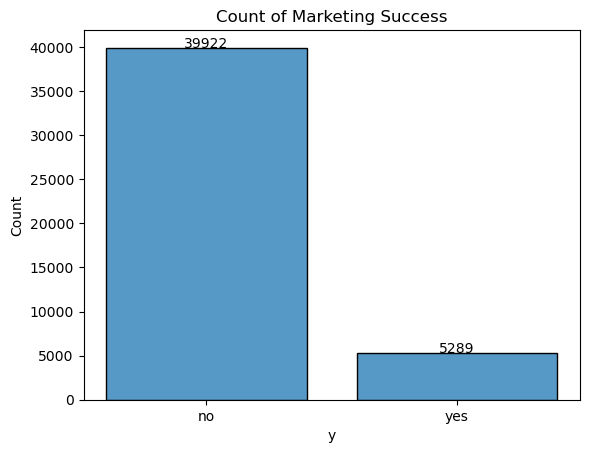

In [8]:
ax = sns.histplot(df['y'], stat = 'count', shrink=.8)

ax.set(title = 'Count of Marketing Success')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height + 0.2,
    s = '{:.0f}'.format(height),
    ha = 'center')      

# What this tells us

The majority of marketing touches failed.
We are looking at about 5,200 successes
This gives us a small percentage to look at however it is enought to draw definitive conclusions

C:\Users\flame\AppData\Local\Temp\ipykernel_24172\2136790087.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


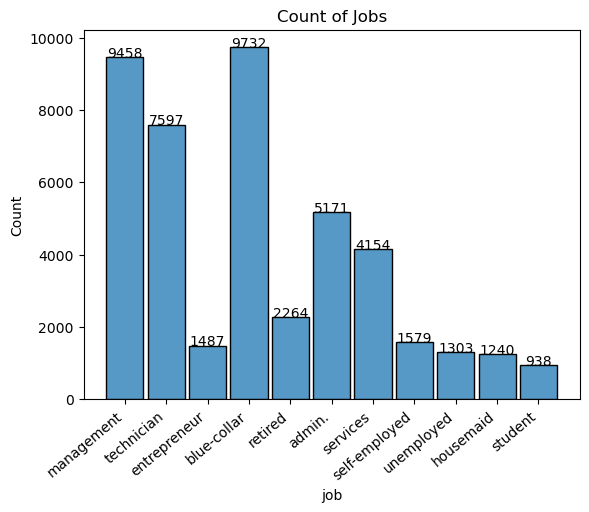

<Figure size 800x600 with 0 Axes>

In [34]:
ax = sns.histplot(df['job'], stat = 'count', shrink=.9)

ax.set(title = 'Count of Jobs')
plt.figure(figsize=(8,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + (p.get_width()/2),
    y = height + 0.2,
    s = '{:.0f}'.format(height),
    ha = 'center')     

# What this tells us

This shows the breakdown of job category. It shows that there are 11 categories of job (not including NA).
The most accounts are blue collar, technician, and management.

# Breakdown of accounts

<AxesSubplot:>

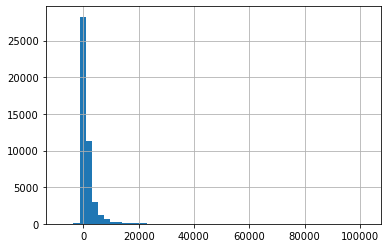

In [71]:
df['balance'].hist(bins = 50)

In [48]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

C:\Users\Tim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

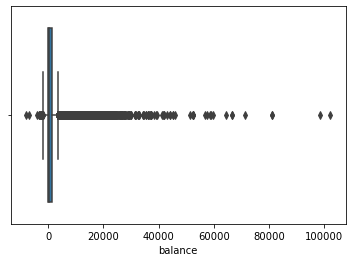

In [25]:
sns.boxplot(df['balance'])


C:\Users\Tim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

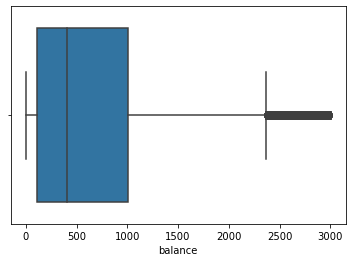

In [24]:
x = df[df['balance'].between(0,3000) ]
sns.boxplot(x['balance'])

# What these show us

The above show the balance of accounts. It shows that the majority of accounts fall between 72-1400. The Boxplot visualizes this extraordinarily well. If you do not take out the outliers you cannot even see the quartiles and mean. The histogram also is a strong visualization showing just how many accounts fall in such a small range.This makes sense as a very small amount of acounts hold a large value. 

# Age

In [51]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: >

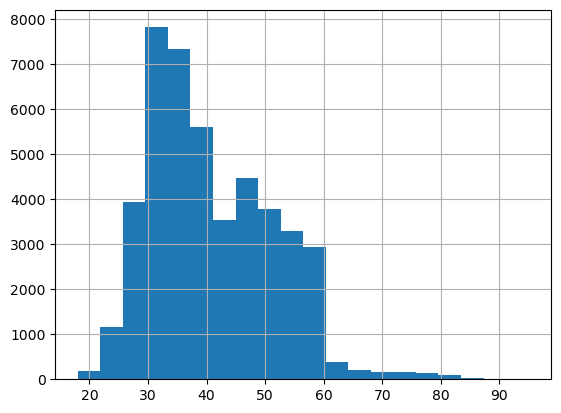

In [54]:
df['age'].hist(bins = 20)

The majority of targets were between 30 and 40 years old
This data is right tailed
This seems to make sense based on what you would logically expect from a working population having a bank account (step increase into 30s decrease into retirement)


# Part II

It is important to think of this from the banks perspective when determining to think of what data  to keep and what data is extraneous. The bank is looking to gain more long term deposit subscribers. They are looking to see how to do that which means they want to know which clients to target for this. It is important to know details like age but it is not important to know a phone number.  This dataset is already fairly clean in that regard and is already a fairly manageable size (45,211 rows, 17 columns). The cleaning for this will consist of managing the NAs, setting dummy variables (there are several yes/no columns), and data type adjustments. The only columns which will be removed are contact duration which seems extraneous without context to the  contact and poutcome as if the previous outcome was a success then we already know they have subscribed. I will also remove 'contact' since it has very little modern relevance. 'NaN in columns Job and Education should be 'unknown' according to the key. '-1' in the pdays column means 'no previous contact' which in this context should be '0'. Therefore I am doing a replace. I want to take a look at contact as both an overall amount and a yes/no value so  I will make a column.      

In [9]:

def clean_df(df):

     #remove columns
    df_clean = df.drop(['poutcome','contact','duration','day_of_week'], axis = 'columns')
    #fill na with unknown on job and education columns
    df_clean[['job','education']] = df_clean[['job','education']].fillna('unknown')
    #replace -1 with zero as -1 represents no contaact
    df_clean['pdays'] = df_clean['pdays'].replace(-1, 0)
    #set previous column to type integer since I was getting an error
    df_clean['previous'].astype(int)
    #make column identifying if there has ever been engagement
    df_clean['pcontact'] =  df_clean['previous'] > 0
    return df_clean

def dummy_data(clean_dat):
    dum_df = pd.get_dummies(clean_dat, drop_first = True)
    return dum_df

In [10]:
clean_df(df)

,age,job,marital,education,default,balance,housing,loan,month,campaign,pdays,previous,y,pcontact
0,58,management,married,tertiary,no,2143,yes,no,may,1,0,0,no,False
1,44,technician,single,secondary,no,29,yes,no,may,1,0,0,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,1,0,0,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,may,1,0,0,no,False
4,33,unknown,single,unknown,no,1,no,no,may,1,0,0,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,nov,3,0,0,yes,False
45207,71,retired,divorced,primary,no,1729,no,no,nov,2,0,0,yes,False
45208,72,retired,married,secondary,no,5715,no,no,nov,5,184,3,yes,True
45209,57,blue-collar,married,secondary,no,668,no,no,nov,4,0,0,no,False


In [11]:
clean = clean_df(df)

In [12]:
clean

,age,job,marital,education,default,balance,housing,loan,month,campaign,pdays,previous,y,pcontact
0,58,management,married,tertiary,no,2143,yes,no,may,1,0,0,no,False
1,44,technician,single,secondary,no,29,yes,no,may,1,0,0,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,1,0,0,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,may,1,0,0,no,False
4,33,unknown,single,unknown,no,1,no,no,may,1,0,0,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,nov,3,0,0,yes,False
45207,71,retired,divorced,primary,no,1729,no,no,nov,2,0,0,yes,False
45208,72,retired,married,secondary,no,5715,no,no,nov,5,184,3,yes,True
45209,57,blue-collar,married,secondary,no,668,no,no,nov,4,0,0,no,False


In [13]:
model_data = dummy_data(clean)

In [62]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   campaign             45211 non-null  int64
 3   pdays                45211 non-null  int64
 4   previous             45211 non-null  int64
 5   pcontact             45211 non-null  bool 
 6   job_blue-collar      45211 non-null  bool 
 7   job_entrepreneur     45211 non-null  bool 
 8   job_housemaid        45211 non-null  bool 
 9   job_management       45211 non-null  bool 
 10  job_retired          45211 non-null  bool 
 11  job_self-employed    45211 non-null  bool 
 12  job_services         45211 non-null  bool 
 13  job_student          45211 non-null  bool 
 14  job_technician       45211 non-null  bool 
 15  job_unemployed       45211 non-null  bool 
 16  job_unknown          4

# Applying a model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [15]:

#selecting data
x = model_data.iloc[:, : 24]
y = model_data['y_yes']

#splitting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


#creating logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.88      1.00      0.94     11960
        True       0.36      0.01      0.01      1604

    accuracy                           0.88     13564
   macro avg       0.62      0.50      0.47     13564
weighted avg       0.82      0.88      0.83     13564



In [16]:
cm = confusion_matrix(y_test,predictions)

In [17]:
cm

array([[11962,    62],
       [ 1496,    44]], dtype=int64)

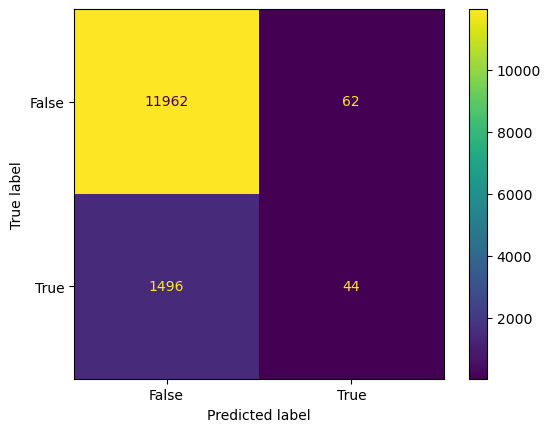

In [18]:
vis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
vis.plot()
plt.show()

Based on the evidence above I would say the model is not very good. We are trying to accurately predict if someone will subscribe to a service (we want to have extreme accuracy in predictions of 'True'). There were 62 True Positives and 4 Trues that were actually Negatives. This also could be just because the sample size of subscriptions is small. As sample size decreases the accuracy of the model would decrease. 

# Oversampling Correction

<Axes: ylabel='count'>

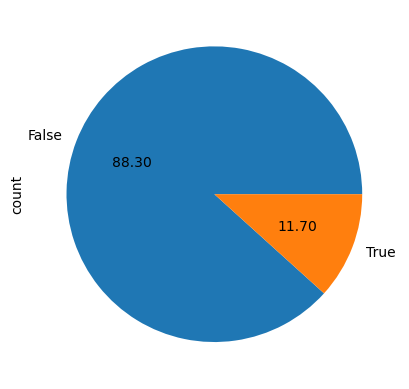

In [59]:
#Show of current breakdown
y.value_counts().plot.pie(autopct='%.2f')

<Axes: ylabel='count'>

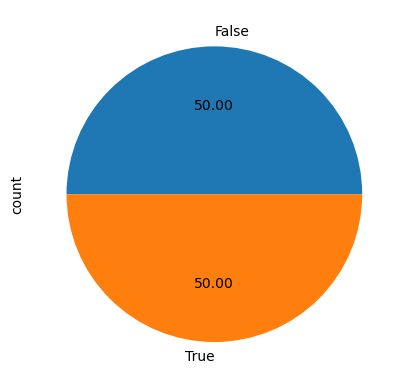

In [60]:
#Import package
from imblearn.over_sampling import SMOTE
#use smote to rebalance
smote=SMOTE(sampling_strategy='minority') 
x_res_smote,y_res_smote=smote.fit_resample(x,y)
#show result
y_res.value_counts().plot.pie(autopct='%.2f')

In [41]:
#Smote sampling model
#splitting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x_res_smote, y_res_smote, test_size = 0.3)


#creating logistic regression
model = LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

C:\Users\Tim\anaconda3\NewAnaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.83      0.85      0.84     11986
        True       0.85      0.82      0.83     11968

    accuracy                           0.84     23954
   macro avg       0.84      0.84      0.84     23954
weighted avg       0.84      0.84      0.84     23954



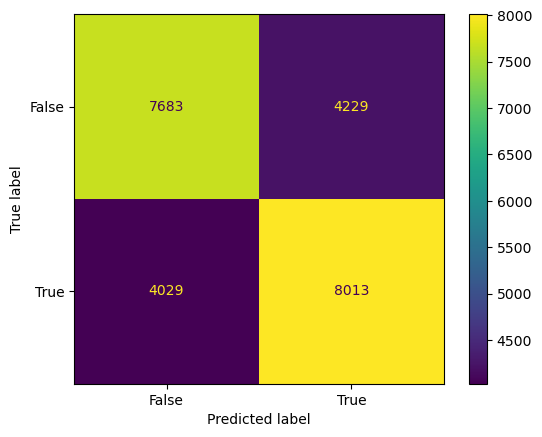

In [43]:
vis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
vis.plot()
plt.show()

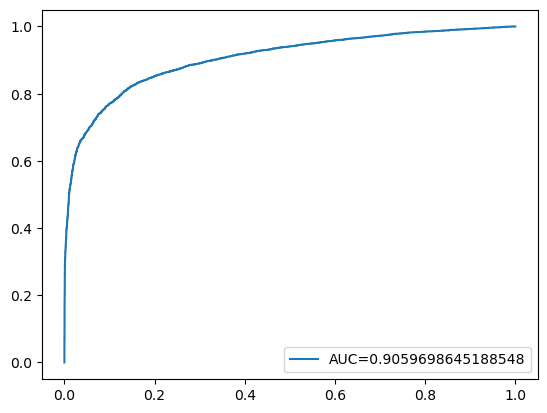

In [50]:
from sklearn import metrics
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()


# Conclusion:



This model did not turn out the way I intended it to. I tried various methods to sort variables by importance and none of them worked out the way I wanted to. I tried using p-values by using sm_model.summary but it didn’t work out. I also tried a method used on Medium which used the math package to pull coefficients. The writers summary suggested that if the customer was a repeat customer as well as had a higher balance they were more likely to subscribe to a long-term deposit. The writer on Medium also used a method to address Over/undersampling that I did not think of involving using a loop to iterate through different levels of sampling to determine the ideal (which was found to be oversampling at 120%). 

Overall I found that my model was still effective. The precision on the True and False was within reason and the ROC curve was exceptional. It is theoretically a useable model.    
